# Question 1: Image Reading and Matrix Fundamentals

This notebook demonstrates basic image processing operations using OpenCV and NumPy.

## Overview
- Task 1: Reading Images (Basics)
- Task 2: Image as a Matrix
- Task 3: Manual Pixel Manipulation
- Task 4: Creating Matrices Manually
- Task 5: Matrix Operations on Images


In [50]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, Union

# Set image path (update this with your image path)
image_path = '/home/yonatan.r/Downloads/istockphoto-520700958-612x612.jpg'  # Replace with your image path


## Task 1: Reading Images (Basics)


In [51]:
def print_image_info(image: np.ndarray) -> None:
    """Print basic information about an image."""
    print("Image Information:")
    print(f"  Shape (height, width, channels): {image.shape}")
    print(f"  Data type: {image.dtype}")
    num_channels = image.shape[2] if len(image.shape) == 3 else 1
    print(f"  Number of channels: {num_channels}")


def display_image_pair(original_rgb: np.ndarray, grayscale: np.ndarray) -> None:
    """Display original and grayscale images side by side."""
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(original_rgb)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(grayscale, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()


def read_and_display_image(image_path: str) -> Tuple[np.ndarray, np.ndarray]:
    """
    Read an image and display basic information about it.
    
    Args:
        image_path: Path to the image file
    
    Returns:
        Tuple containing (original_image, grayscale_image)
    """
    original_image = cv2.imread(image_path)
    
    if original_image is None:
        raise ValueError(f"Could not read image from {image_path}")
    
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    
    print_image_info(original_image)
    display_image_pair(original_image_rgb, grayscale_image)
    
    return original_image, grayscale_image


QUESTION 1: Image Reading and Matrix Fundamentals

[TASK 1] Reading Images (Basics)
------------------------------------------------------------
Image Information:
  Shape (height, width, channels): (408, 612, 3)
  Data type: uint8
  Number of channels: 3


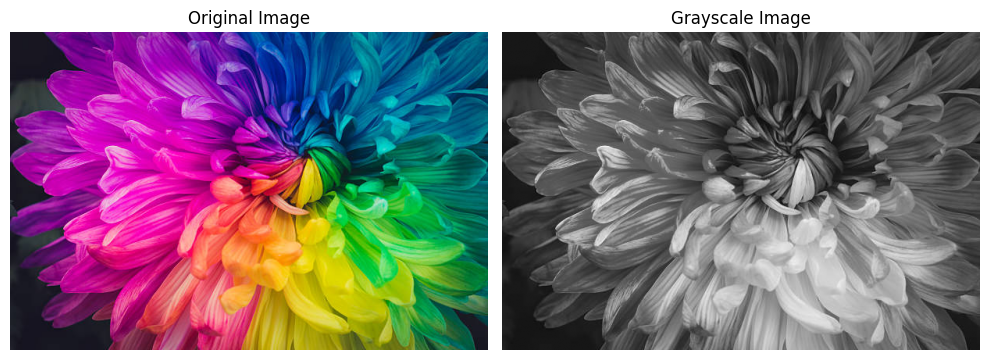

In [52]:
# Execute Task 1
print("="*60)
print("QUESTION 1: Image Reading and Matrix Fundamentals")
print("="*60)

print("\n[TASK 1] Reading Images (Basics)")
print("-" * 60)
original_image, grayscale_image = read_and_display_image(image_path)


## Task 2: Image as a Matrix


In [ ]:
def display_rgb_matrix_section(matrix_section: np.ndarray, size: int, 
                                start_row: int, start_col: int) -> None:
    """Display RGB image matrix section with all channels."""
    print(f"\nRGB Image Matrix Section ({size}x{size}) starting at ({start_row}, {start_col}):")
    print("Shape:", matrix_section.shape)
    print("Red channel:")
    print(matrix_section[:, :, 0])
    print("Green channel:")
    print(matrix_section[:, :, 1])
    print("Blue channel:")
    print(matrix_section[:, :, 2])


def display_grayscale_matrix_section(matrix_section: np.ndarray, size: int,
                                     start_row: int, start_col: int) -> None:
    """Display grayscale image matrix section."""
    print(f"\nGrayscale Image Matrix Section ({size}x{size}) starting at ({start_row}, {start_col}):")
    print(matrix_section)


def display_image_matrix_section(image: np.ndarray, size: int = 5, 
                                  start_row: int = 0, start_col: int = 0) -> np.ndarray:
    """
    Display a small section of the image matrix.
    
    Args:
        image: Image array (can be RGB or grayscale)
        size: Size of the block to display (default: 5x5)
        start_row: Starting row index
        start_col: Starting column index
    
    Returns:
        The extracted matrix section
    """
    end_row = start_row + size
    end_col = start_col + size
    
    if len(image.shape) == 3:
        matrix_section = image[start_row:end_row, start_col:end_col, :]
        display_rgb_matrix_section(matrix_section, size, start_row, start_col)
    else:
        matrix_section = image[start_row:end_row, start_col:end_col]
        display_grayscale_matrix_section(matrix_section, size, start_row, start_col)
    
    return matrix_section


def explain_matrix_types() -> None:
    """Print explanations about different image matrix types."""
    print("\n" + "="*60)
    print("EXPLANATION: Image Matrix Types")
    print("="*60)
    
    print("\n1. RGB Image Matrix:")
    print("   - 3D array: (height, width, 3)")
    print("   - Each pixel has 3 values: [Red, Green, Blue]")
    print("   - Values range from 0 to 255")
    print("   - Example: [255, 0, 0] = pure red")
    
    print("\n2. Grayscale Matrix:")
    print("   - 2D array: (height, width)")
    print("   - Each pixel has 1 value representing intensity")
    print("   - Values range from 0 (black) to 255 (white)")
    print("   - Example: 128 = medium gray")
    
    print("\n3. Binary (Thresholded) Matrix:")
    print("   - 2D array: (height, width)")
    print("   - Each pixel has 1 value: 0 (black) or 255 (white)")
    print("   - Created by thresholding grayscale image")
    print("   - Example: 0 = black, 255 = white")
    print("="*60 + "\n")


In [53]:
# Execute Task 2
print("\n[TASK 2] Image as a Matrix")
print("-" * 60)
display_image_matrix_section(original_image, size=7, start_row=10, start_col=50)
display_image_matrix_section(grayscale_image, size=7, start_row=10, start_col=50)
explain_matrix_types()



[TASK 2] Image as a Matrix
------------------------------------------------------------

RGB Image Matrix Section (7x7) starting at (10, 50):
Shape: (7, 7, 3)
Red channel:
[[ 58  89 118 136 141 136 135]
 [ 39  65  95 121 136 142 133]
 [ 32  46  66  95 123 140 132]
 [ 32  34  42  65  98 121 135]
 [ 32  27  28  42  68  88 132]
 [ 33  24  22  32  48  63 125]
 [ 34  34  34  34  34  34  63]]
Green channel:
[[18 23 29 29 21 12 23]
 [18 22 28 29 24 18 19]
 [23 23 22 25 29 31 22]
 [26 24 18 20 29 39 29]
 [27 24 18 19 28 36 32]
 [24 23 20 20 25 30 29]
 [21 21 21 21 21 21 17]]
Blue channel:
[[ 29  48  73  92 102 104 101]
 [ 16  25  49  78 101 110  96]
 [ 14  15  28  56  88 109  94]
 [ 19  14  18  37  66  88  98]
 [ 26  20  18  24  40  54  98]
 [ 27  25  20  20  23  27  93]
 [ 23  23  23  23  23  23  39]]

Grayscale Image Matrix Section (7x7) starting at (10, 50):
[[26 38 52 60 59 54 59]
 [20 28 42 54 60 60 55]
 [21 23 29 42 57 67 56]
 [25 22 21 30 48 63 62]
 [27 23 19 23 36 47 63]
 [26 24 20 21

## Task 3: Manual Pixel Manipulation
